# Decision Tree

Decision Tree is a Supervised learning technique that can be applicable for both classification and Regression problems, but generally it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, edges represent the decision rules and each leaf node represents the outcome.
It is a graphical representation for all the possible solutions to a problem based on given conditions.
In tree construction, we use the Classification and Regression Tree (CART) algorithm.

Steps of Algorithm:

Step-1: Begin the tree with the root node, says S, which contains the dataset as a whole.      
Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).     
Step-3: Divide the S into subsets that contains possible values for the best attributes.    
Step-4: Generate the decision tree node, which havings the best attribute.    
Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further split the nodes and called the final node as a leaf node.

## Decision tree on titanic dataset

##### Import required libraries 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_curve,auc
from sklearn import tree
from sklearn.feature_selection import SelectKBest,chi2
from warnings import filterwarnings
filterwarnings('ignore')

##### Load dataset

In [2]:
# Check existing datasets of seaborn

#print(sns.get_dataset_names())

In [3]:
# Load dataset and check first five records

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Check descriptive analysis to see number of records and columns, number of non null records and their datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### Deal with missing values

In [6]:
df.age.fillna(df.age.mean(),inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### Data Preprocessing

In [7]:
# Drop columns with redundant information and deck as it has large missing data

nd = df.drop(columns = ['who','adult_male','deck','alive','embarked'])
nd.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,True


In [8]:
nd.rename(columns = {'class':'level'},inplace = True)

##### Check nuber of unique categories in each column

In [9]:
nd.sex.nunique()

2

In [10]:
nd.level.nunique()

3

In [11]:
nd.embark_town.nunique()

3

In [12]:
nd.alone.nunique()

2

##### Apply encoding as number of categorical columns

In [13]:
lb = LabelBinarizer()

In [14]:
nd.sex = lb.fit_transform(nd.sex)

In [15]:
nd[:2]

,survived,pclass,sex,age,sibsp,parch,fare,level,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,Third,Southampton,False
1,1,1,0,38.0,1,0,71.2833,First,Cherbourg,False


##### Check heatmap to analyse multicolinearity

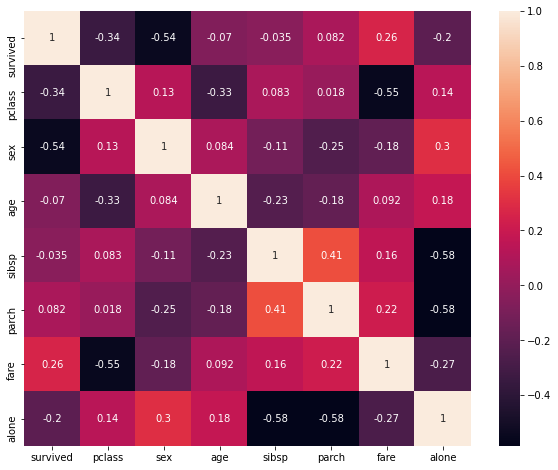

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(nd.corr(),annot = True)
plt.show()

In [17]:
oe = OneHotEncoder()

In [18]:
# Check unique categories in column level

nd.level.unique()

['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']

In [19]:
# Apply OneHotEncoder

nd[['First','Second','Third']] = oe.fit_transform(nd[['level']]).toarray()

In [20]:
nd.drop(columns = ['level','Third'],inplace = True)
nd[:1]

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,First,Second
0,0,3,1,22.0,1,0,7.25,Southampton,False,0.0,0.0


In [21]:
# Check classes in column embark_town

nd.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [22]:
# Apply OneHotEncoder

nd[['Southampton', 'Cherbourg', 'Queenstown', 'nan']] = oe.fit_transform(nd[['embark_town']]).toarray()

In [23]:
# Drop origional column and see the result

nd.drop(columns = ['embark_town','nan'],inplace = True)
nd[:1]

,survived,pclass,sex,age,sibsp,parch,fare,alone,First,Second,Southampton,Cherbourg,Queenstown
0,0,3,1,22.0,1,0,7.25,False,0.0,0.0,0.0,0.0,1.0


In [24]:
# Check categories of alone column

nd.alone.unique()

array([False,  True])

In [25]:
nd[:2]

,survived,pclass,sex,age,sibsp,parch,fare,alone,First,Second,Southampton,Cherbourg,Queenstown
0,0,3,1,22.0,1,0,7.2500,False,0.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,False,1.0,0.0,1.0,0.0,0.0


In [26]:
# Apply OneHotEncoder

nd[['False','True']] = oe.fit_transform(nd[['alone']]).toarray()
nd

,survived,pclass,sex,age,sibsp,parch,fare,alone,First,Second,Southampton,Cherbourg,Queenstown,False,True
0,0,3,1,22.000000,1,0,7.2500,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,1,0,38.000000,1,0,71.2833,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,3,0,26.000000,0,0,7.9250,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1,1,0,35.000000,1,0,53.1000,False,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,3,1,35.000000,0,0,8.0500,True,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,True,0.0,1.0,0.0,0.0,1.0,0.0,1.0
887,1,1,0,19.000000,0,0,30.0000,True,1.0,0.0,0.0,0.0,1.0,0.0,1.0
888,0,3,0,29.699118,1,2,23.4500,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0
889,1,1,1,26.000000,0,0,30.0000,True,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
nd.drop(columns = ['alone','True'],inplace = True)
nd.head()

,survived,pclass,sex,age,sibsp,parch,fare,First,Second,Southampton,Cherbourg,Queenstown,False
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,0.0,0.0,1.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
nd.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
First          0
Second         0
Southampton    0
Cherbourg      0
Queenstown     0
False          0
dtype: int64

##### Data sagrigation into input and output 

In [29]:
# Get input and check first five records

X = nd.drop(columns = ['survived'])
X.head()

,pclass,sex,age,sibsp,parch,fare,First,Second,Southampton,Cherbourg,Queenstown,False
0,3,1,22.0,1,0,7.2500,0.0,0.0,0.0,0.0,1.0,1.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,1.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
y = nd.survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

##### Select K best features from the set of input features

In [31]:
select = SelectKBest(chi2,k = 7)
z = select.fit_transform(X,y)

In [32]:
filter = select.get_support()
features = np.array(X.columns)
 
print("All features:")
print(features)
 
print("Selected best 8:")
print(features[filter])
X = pd.DataFrame(z, columns = features[filter])
X.head()

All features:
['pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'First' 'Second'
 'Southampton' 'Cherbourg' 'Queenstown' 'False']
Selected best 8:
['pclass' 'sex' 'age' 'fare' 'First' 'Southampton' 'False']


,pclass,sex,age,fare,First,Southampton,False
0,3.0,1.0,22.0,7.2500,0.0,0.0,1.0
1,1.0,0.0,38.0,71.2833,1.0,1.0,1.0
2,3.0,0.0,26.0,7.9250,0.0,0.0,0.0
3,1.0,0.0,35.0,53.1000,1.0,0.0,1.0
4,3.0,1.0,35.0,8.0500,0.0,0.0,0.0


##### Split data into training and testing

In [33]:
skf = StratifiedKFold(n_splits = 4)

In [34]:
list(skf.split(X,y))

[(array([212, 213, 214, 217, 219, 221, 222, 223, 225, 227, 228, 229, 231,
         232, 234, 235, 236, 238, 239, 240, 242, 243, 244, 245, 246, 248,
         249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
         262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
         275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
         288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
         301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
         314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
         327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
         340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
         353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365,
         366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378,
         379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391,
         392, 393, 394, 395, 396, 397,

In [35]:
dt = DecisionTreeClassifier(max_depth=5)

In [36]:
score = []
for train_index,test_index in skf.split(X,y):
    X_train,X_test,y_train,y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    dt.fit(X_train,y_train)
    score.append(dt.score(X_test,y_test))

In [37]:
score

[0.7533632286995515,
 0.8385650224215246,
 0.7892376681614349,
 0.8378378378378378]

In [38]:
np.mean(score) * 100

80.47509392800872

In [39]:
y_pred = dt.predict(X_test)

##### Check accuracy of total data

In [40]:
dt.score(X,y) * 100

84.0628507295174

##### Check accuracy of training data

In [41]:
dt.score(X_train, y_train) * 100

84.15545590433483

##### Check accuracy of testing data

In [42]:
dt.score(X_test, y_test) * 100

83.78378378378379

##### Testing / Prediction

In [43]:
# Data for testing

X_test[:6]

,pclass,sex,age,fare,First,Southampton,False
653,3.0,0.0,29.699118,7.8292,0.0,0.0,0.0
660,1.0,1.0,50.000000,133.6500,1.0,0.0,1.0
664,3.0,1.0,20.000000,7.9250,0.0,0.0,1.0
669,1.0,0.0,29.699118,52.0000,1.0,0.0,1.0
670,2.0,0.0,40.000000,39.0000,0.0,0.0,1.0
673,2.0,1.0,31.000000,13.0000,0.0,0.0,0.0


In [44]:
# Actual output
y_test[:6]

653    1
660    1
664    1
669    1
670    1
673    1
Name: survived, dtype: int64

In [45]:
# Predicted output
y_pred = dt.predict(X_test)
y_pred[:6]

array([1, 0, 0, 1, 1, 0], dtype=int64)

In [46]:
params = {'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_depth':[5,10,15], 'min_samples_split':[1,2], 'max_features':[None,'auto','sqrt','log2'], 'random_state':[1,2,42,85]}

In [47]:
result = GridSearchCV(dt,params,cv = 3)
result.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2],
                         'random_state': [1, 2, 42, 85],
                         'splitter': ['best', 'random']})

In [48]:
result.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 2,
 'random_state': 2,
 'splitter': 'random'}

In [49]:
result.best_score_

0.8101644245142002

In [50]:
y_predict = result.predict(X_test)

##### Confusion matrix
It is to check different accuracy metrix for data

In [51]:
confusion_matrix(y_test,y_pred)

array([[124,  13],
       [ 23,  62]], dtype=int64)

In [52]:
len(y_test[y_test == 0])

137

In [53]:
len(y_pred[y_pred == 0])

147

In [54]:
# Check classification report to see different matrix for data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       137
           1       0.83      0.73      0.77        85

    accuracy                           0.84       222
   macro avg       0.84      0.82      0.82       222
weighted avg       0.84      0.84      0.84       222



In [55]:
# false positive rate
#true positive rate
# threshold


rc = roc_curve(y_test,y_pred)
rc

(array([0.        , 0.09489051, 1.        ]),
 array([0.        , 0.72941176, 1.        ]),
 array([2, 1, 0], dtype=int64))

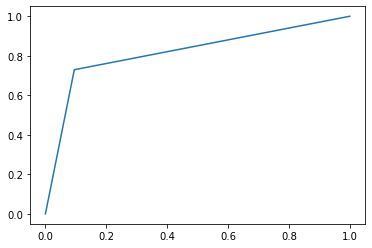

In [56]:
plt.plot(rc[0],rc[1])

In [57]:
auc(rc[0],rc[1])

0.8172606268784885

##### Plot the tree

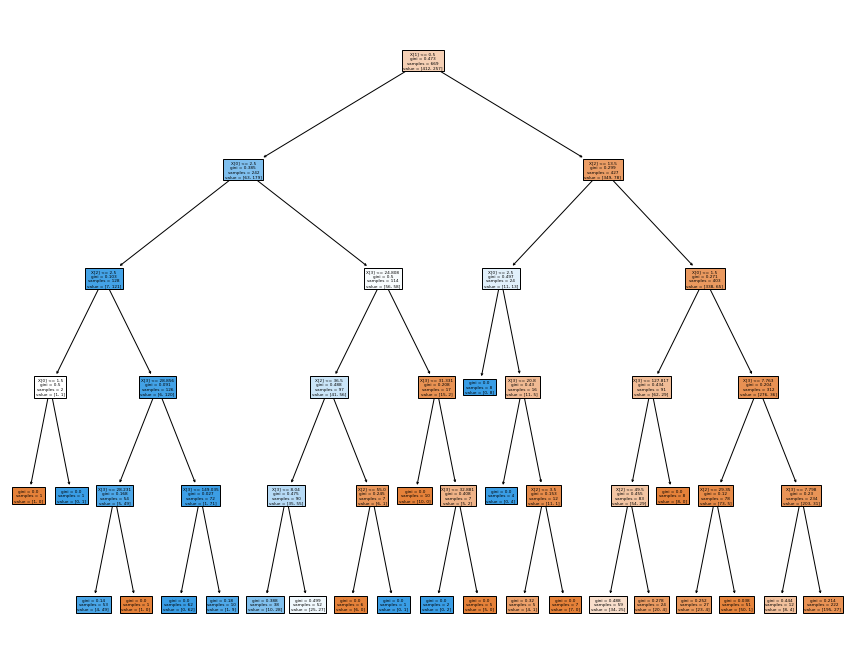

In [58]:
plt.figure(figsize = (15,12))
tree.plot_tree(dt,filled = True)
plt.show()